In [14]:
import geopandas as gpd
import matplotlib.pyplot as plt 
import os
import pandas as pd 
from shapely.geometry import Point

In [5]:
root_dpath='/Users/zeynmehezmacbook/Desktop/AladinDocs/Data-Hub'

In [7]:
df_aqi=pd.read_csv(os.path.join(root_dpath,'aqi-indian-cities.csv'))

In [8]:
df_aqi

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Andhra_Pradesh,Visakhapatnam,"GVM Corporation, Visakhapatnam - APPCB",12-03-2025 11:00:00,17.720000,83.300000,CO,12.0,64.0,33.0
1,India,Arunachal_Pradesh,Naharlagun,"Naharlagun, Naharlagun - APSPCB",12-03-2025 11:00:00,27.103358,93.679645,PM10,47.0,148.0,94.0
2,India,Arunachal_Pradesh,Naharlagun,"Naharlagun, Naharlagun - APSPCB",12-03-2025 11:00:00,27.103358,93.679645,SO2,5.0,6.0,6.0
3,India,Assam,Byrnihat,"Central Academy for SFS, Byrnihat - PCBA",12-03-2025 11:00:00,26.071318,91.874880,PM2.5,NaN,NaN,NaN
4,India,Assam,Byrnihat,"Central Academy for SFS, Byrnihat - PCBA",12-03-2025 11:00:00,26.071318,91.874880,PM10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3159,India,West_Bengal,Howrah,"Dasnagar, Howrah - WBPCB",12-03-2025 11:00:00,22.602557,88.310566,NH3,3.0,5.0,4.0
3160,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",12-03-2025 11:00:00,22.544808,88.340369,PM10,92.0,124.0,103.0
3161,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",12-03-2025 11:00:00,22.544808,88.340369,NO2,21.0,261.0,104.0
3162,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",12-03-2025 11:00:00,22.544808,88.340369,SO2,3.0,9.0,6.0


In [10]:
df_aqi['pollutant_id'].value_counts()

pollutant_id
NO2      468
PM2.5    467
PM10     465
CO       458
OZONE    450
SO2      444
NH3      412
Name: count, dtype: int64

In [21]:
df_aqi['pollutant_id'].unique()

array(['CO', 'PM10', 'SO2', 'PM2.5', 'NH3', 'OZONE', 'NO2'], dtype=object)

In [12]:
df_aqi['state'].nunique()

29

In [13]:
df_aqi['city'].nunique()

240

In [16]:
geometry=gpd.points_from_xy(df_aqi['longitude'],df_aqi['latitude'])
gdf_aqi=gpd.GeoDataFrame(df_aqi,crs='epsg:4326',geometry=geometry)

In [30]:
gdf_aqi['weather_station']=gdf_aqi['geometry']

In [19]:
gdf_aqi.head()

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg,geometry
0,India,Andhra_Pradesh,Visakhapatnam,"GVM Corporation, Visakhapatnam - APPCB",12-03-2025 11:00:00,17.720000,83.300000,CO,12.0,64.0,33.0,POINT (83.3 17.72)
1,India,Arunachal_Pradesh,Naharlagun,"Naharlagun, Naharlagun - APSPCB",12-03-2025 11:00:00,27.103358,93.679645,PM10,47.0,148.0,94.0,POINT (93.67964 27.10336)
2,India,Arunachal_Pradesh,Naharlagun,"Naharlagun, Naharlagun - APSPCB",12-03-2025 11:00:00,27.103358,93.679645,SO2,5.0,6.0,6.0,POINT (93.67964 27.10336)
3,India,Assam,Byrnihat,"Central Academy for SFS, Byrnihat - PCBA",12-03-2025 11:00:00,26.071318,91.874880,PM2.5,NaN,NaN,NaN,POINT (91.87488 26.07132)
4,India,Assam,Byrnihat,"Central Academy for SFS, Byrnihat - PCBA",12-03-2025 11:00:00,26.071318,91.874880,PM10,NaN,NaN,NaN,POINT (91.87488 26.07132)


<Axes: >

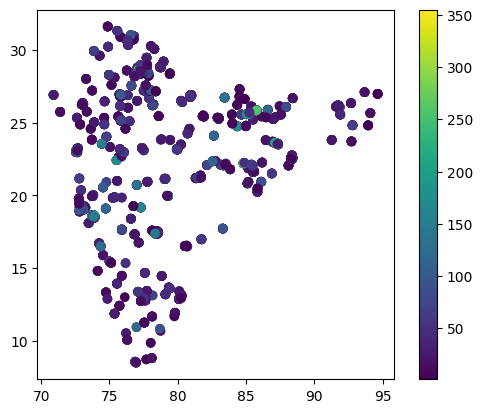

In [23]:
gdf_aqi.plot(column='pollutant_avg',legend=True)

<Axes: >

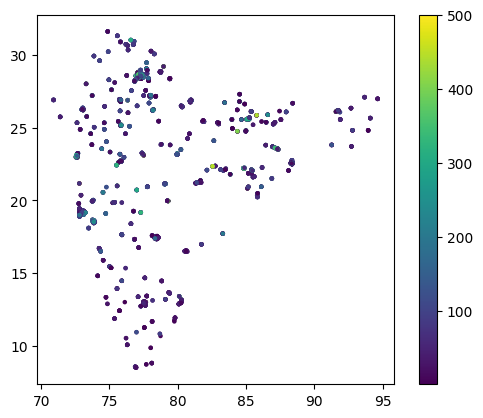

In [25]:
gdf_aqi.plot(column='pollutant_max',legend=True,markersize=5)

In [27]:
df_ind_state_polygon=gpd.read_file(os.path.join(root_dpath,'indian-state-polygon/Indian_States.shp'))

In [29]:
df_ind_state_polygon.head()

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.1686 29.37432,..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.7429 26...."
3,Bihar,"MULTIPOLYGON (((84.5072 24.26323, 84.50355 24...."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


<Axes: >

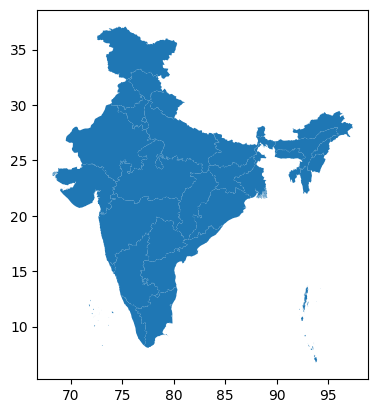

In [28]:
df_ind_state_polygon.plot()

In [36]:
gdf_state_weather_station=gpd.sjoin(df_ind_state_polygon,gdf_aqi,how='left',predicate='contains')

<Axes: >

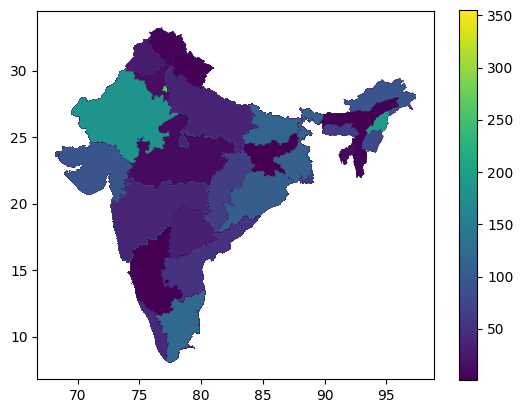

In [37]:
gdf_state_weather_station.plot(column='pollutant_avg',legend=True)

<Axes: >

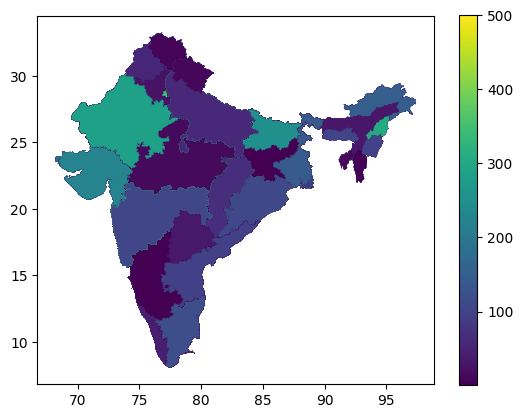

In [38]:
gdf_state_weather_station.plot(column='pollutant_max',legend=True)

In [39]:
df_ind_dist_polygon=gpd.read_file(os.path.join(root_dpath,'indian-district-polygon','DISTRICT_BOUNDARY.shp'))

In [42]:
df_ind_dist_polygon=df_ind_dist_polygon.to_crs('EPSG:4326')

In [43]:
gdf_distrcit_weather_station=gpd.sjoin(df_ind_dist_polygon,gdf_aqi,how='left',predicate='contains')

<Axes: >

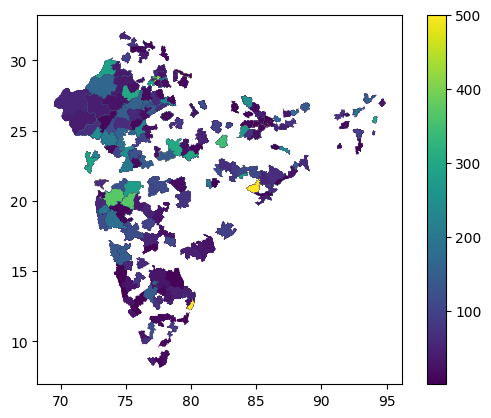

In [44]:
gdf_distrcit_weather_station.plot(column='pollutant_max',legend=True)

<Axes: >

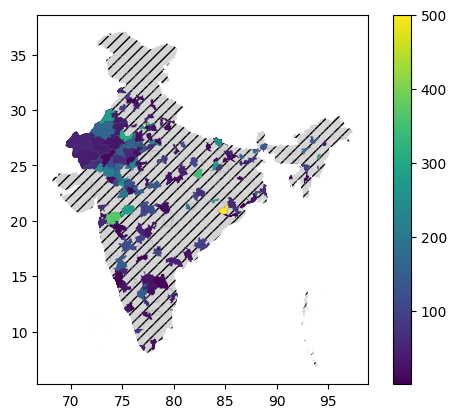

In [50]:
gdf_distrcit_weather_station.plot(
    column="pollutant_max",
    legend=True,
   missing_kwds={
        "color": "lightgrey",
        "hatch": "///",
        "label": "Missing values",
    },
   
    
)